In [ ]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [ ]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize = (13,7))
    nx.draw_networkx(g,
                     pos=p,
                    
                     font_size = 12, 
                     font_weight = 'bold',
                     font_color = 'plum',
                     edge_color = 'grey'
                    )
    
    nodes = nx.draw_networkx_nodes(g, p,cmap=plt.get_cmap('Blues') ,node_color=[c for c in centrality.values()],
                     node_size = 600,
                     )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

In [ ]:
g = nx.Graph()
g.add_edges_from([(1,2),
                 (1,3),
                 #(1,4),
                 (1,5),
                 (1,6),
                 (2,5),
                 (5,4),
                 (3,5),
                  
                 (3,4),
                 (3,7),
                 (2,6),
                 (4,7),
                 (5,6),
                 (5,7),
                 (6,7),
                 (6,8),
                  #(6,11),(6,12),
                 (7,8),
                  (8,9),(10,9),(10,11),(10,12),(10,13),(10,14),(10,15)
                 ])




In [ ]:
print(g)
posizione = nx.spring_layout(g)

Graph with 15 nodes and 23 edges


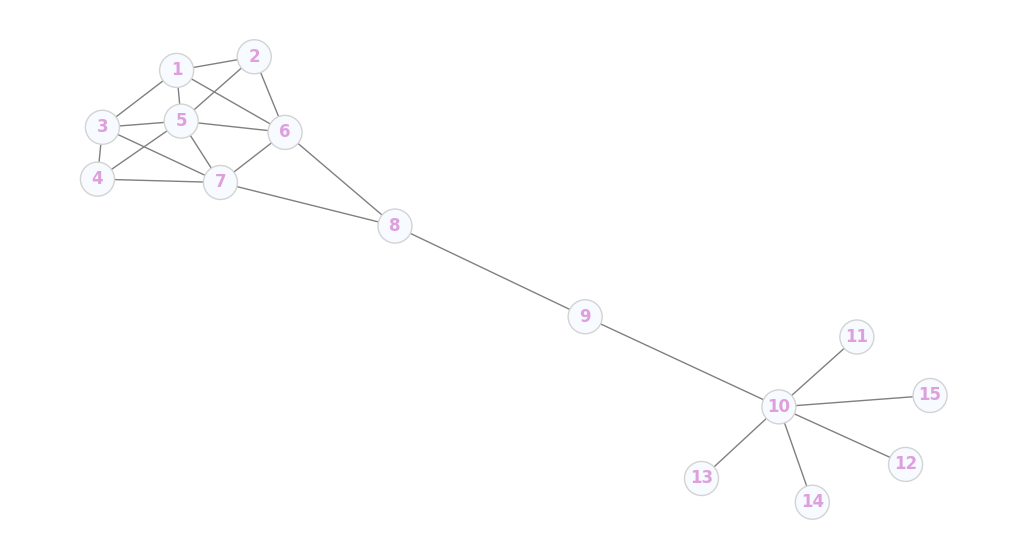

In [ ]:

draw_network_colored(g, posizione, {i:0 for i in g.nodes()})

# Degree centrality
<a href = 'https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality'> Networkx doc </a>

__classica concezione di centralità delle social network, più amici/follower hai e più sei centrale__

In [ ]:
degree_centrality = nx.degree_centrality(g)
#degree_centrality

__equivale al grado normalizzato__

In [ ]:
degree=dict(nx.degree(g))
degree_centrality = {n: round(c/(g.order()-1),4) for n,c in degree.items()}
node_d_centr = list(degree_centrality.items())
node_d_centr.sort(key = lambda x: x[1], reverse = True)
node_d_centr[:5]

[(5, 0.4286), (10, 0.4286), (6, 0.3571), (7, 0.3571), (1, 0.2857)]

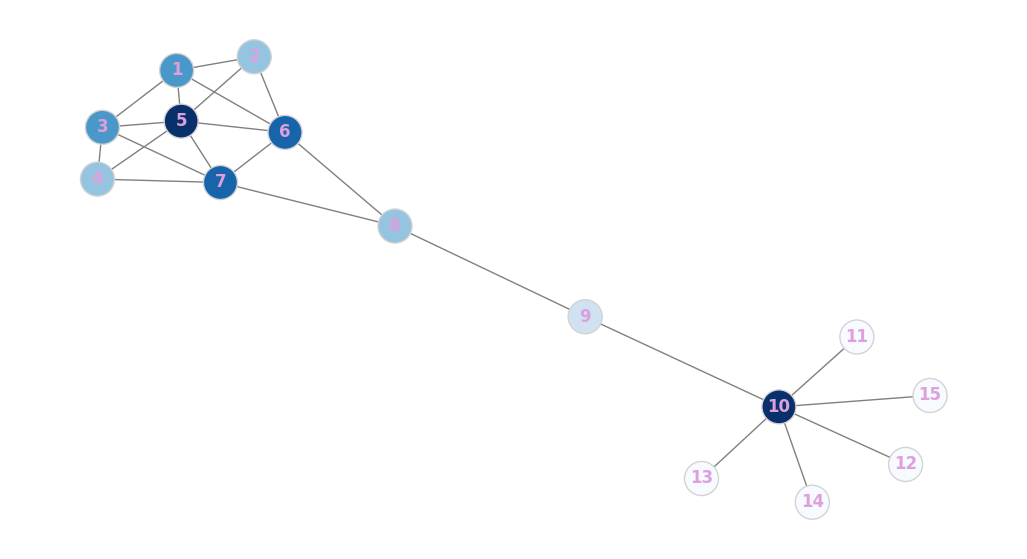

In [ ]:
#let's visualize the network with nodes colored 
draw_network_colored(g, posizione, degree_centrality)

# Closeness centrality
<a href = 'https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html'> Networkx doc </a>
* __un nodo è più centrale se riesce a raggiungere gli altri nodi più velocemente (path più corto)__ 
* real life example: *se voglio diffondere un avviso in una rete di comunicazioni, conviene far partire l'avviso dai nodi con closeness centrality più alta*

In [ ]:
closeness_centrality = nx.closeness_centrality(g)
node_c_centr = list(closeness_centrality.items())
node_c_centr.sort(key = lambda x: x[1], reverse = True)
node_c_centr[:5]

[(8, 0.4666666666666667),
 (9, 0.45161290322580644),
 (6, 0.4117647058823529),
 (7, 0.4117647058823529),
 (10, 0.4117647058823529)]

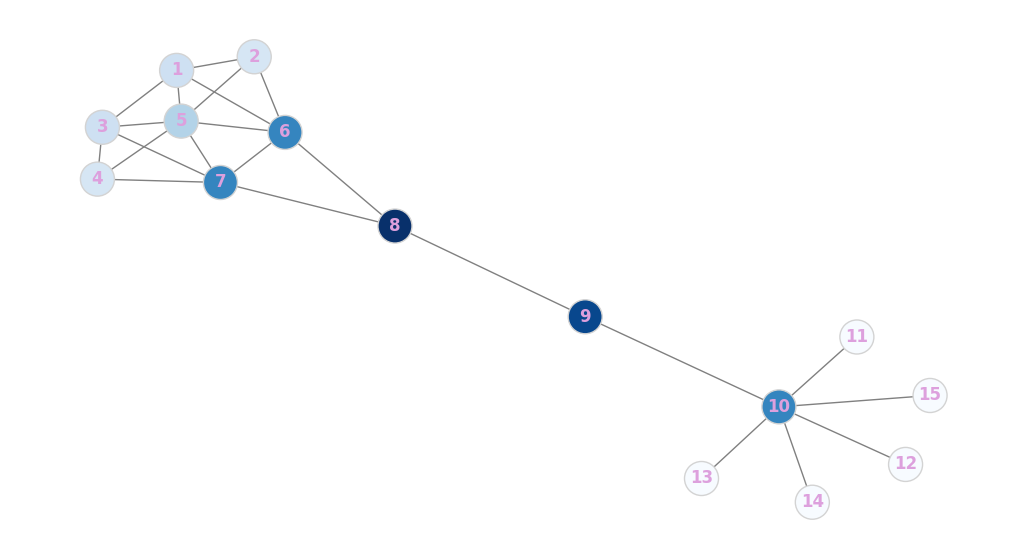

In [ ]:
draw_network_colored(g, posizione, closeness_centrality)

# Betweeness centrality
<a href = 'https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality'> Networkx doc </a>
* un nodo è più centrale se è nel mezzo di più cammini minimi
* real life example: *in una rete di terroristi, conviene agire sulle comunicazioni tra i nodi con betweeness centrality più alta, così che la rete venga discconnessa più velocemente* 

In [ ]:
betweenness_centrality=nx.betweenness_centrality(g)
node_b_centr = list(betweenness_centrality.items())
node_b_centr.sort(key = lambda x: x[1], reverse = True)
node_b_centr[:5]

[(10, 0.6043956043956045),
 (8, 0.5384615384615385),
 (9, 0.5274725274725275),
 (6, 0.22893772893772898),
 (7, 0.22893772893772898)]

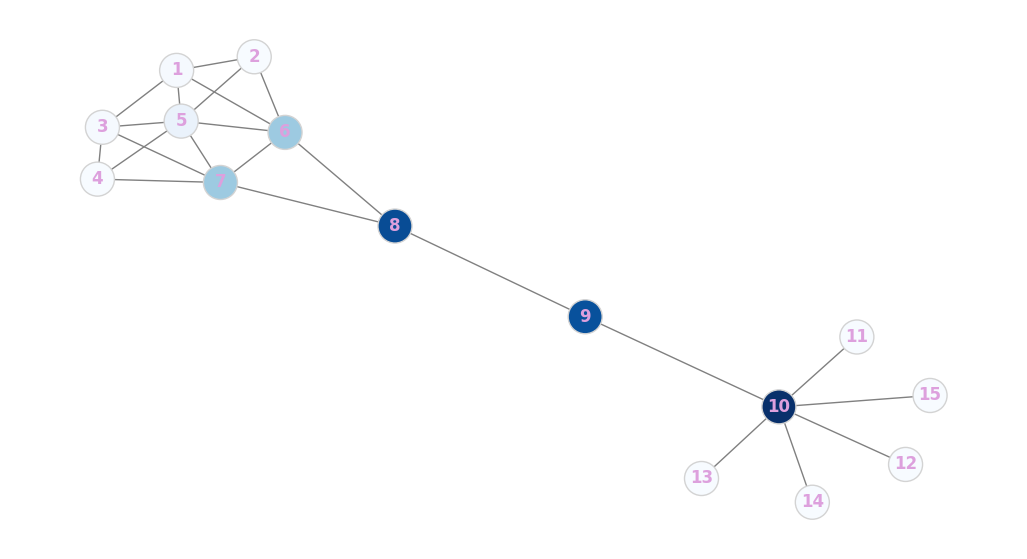

In [ ]:
draw_network_colored(g, posizione, betweenness_centrality)

# Eigenvector centrality
<a href = 'https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html'> Networkx doc </a>
* un nodo è centrale tanto più i nodi a cui è vicino sono centrali
* real life example poco politically correct: la popolarità della reginetta del ballo 
* real life example moralmente migliore: le pagine su google, se io creo tantissime pagine web dove metto il link alla mia pagina personale, questo non fa di me una pagina centrale. Sarà più centrale una pagina di dati che viene linkata da molte pagine di giornali ad esempio

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(g,200)
node_e_centr = list(eigenvector_centrality.items())
node_e_centr.sort(key = lambda x: x[1], reverse = True)
node_e_centr[:5]


[(5, 0.4809055537794832),
 (6, 0.39765137400982187),
 (7, 0.39765137400982187),
 (1, 0.35211966007077433),
 (3, 0.35211966007077433)]

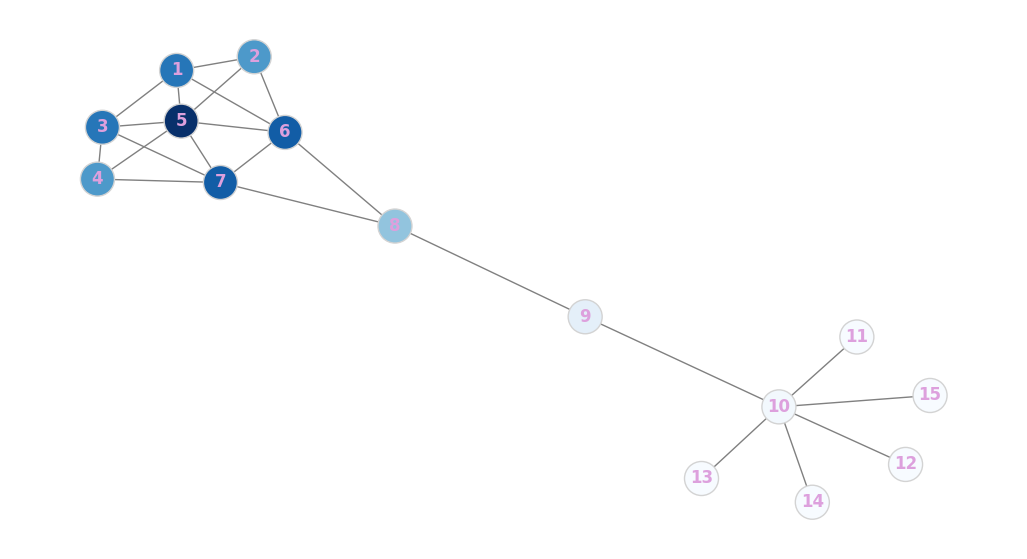

In [ ]:
draw_network_colored(g, posizione, eigenvector_centrality)

# Comparison

#### the pearson correlation is useful to check if the distribution of centralities is similar with different centrality measure

In [ ]:
all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
corrs = [[scipy.stats.pearsonr(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

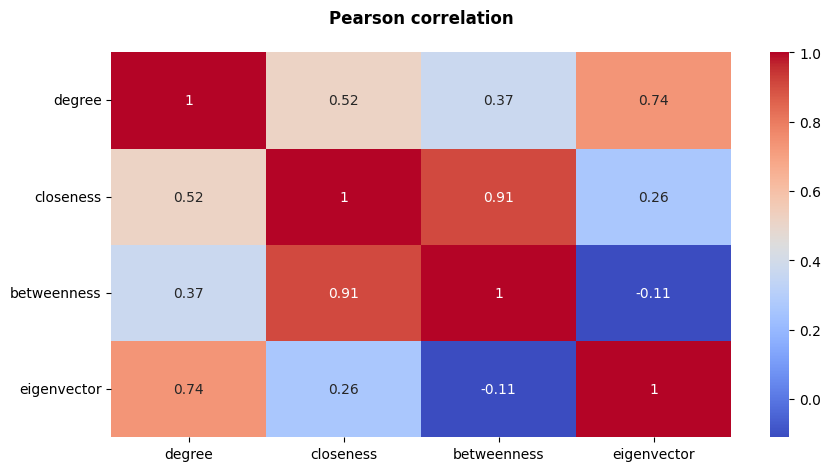

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(pd.DataFrame(corrs),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('Pearson correlation\n', weight = 'bold')
plt.show()


## HOWEVER
#### to check if two measures detects similar hubs, we need a ranking coefficient!

In [ ]:
all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
ranks = [[scipy.stats.weightedtau(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

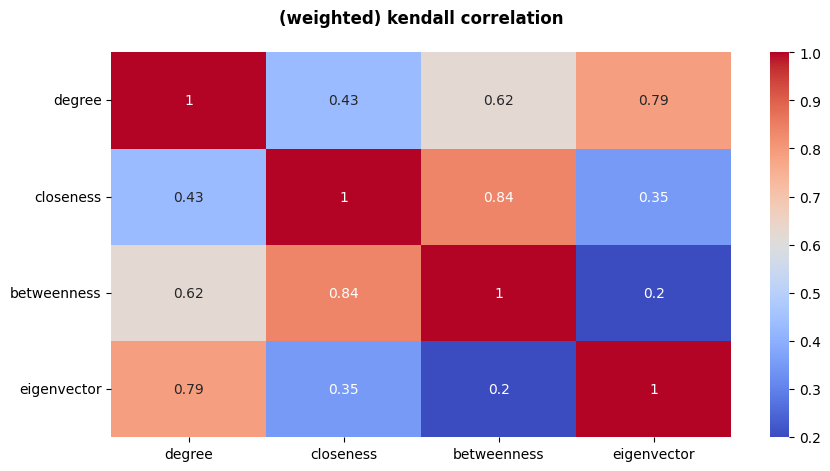

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(pd.DataFrame(ranks),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('(weighted) kendall correlation\n', weight = 'bold')
plt.show()

In [ ]:
# example: closeness_centrality and betweeness centrality share the same nodes in the highest part of the ranking!

In [ ]:
scipy.stats.weightedtau(list(closeness_centrality.values()), list(betweenness_centrality.values()))[0], scipy.stats.weightedtau(node_c_centr[:5], node_b_centr[:5])[0]

(0.8383338394736636, 0.5487234056366639)

In [ ]:
scipy.stats.weightedtau(list(closeness_centrality.values()), list(betweenness_centrality.values()))[0], scipy.stats.weightedtau(list(degree_centrality.values()), list(betweenness_centrality.values()))[0]

(0.8383338394736636, 0.6225165983326579)

In [ ]:
print([x[0] for x in node_c_centr[:5]])
print([x[0] for x in node_b_centr[:5]])


[8, 9, 6, 7, 10]
[10, 8, 9, 6, 7]


In [ ]:
G_uc = nx.read_graphml('./data/ucsocial_directed.graphml')
print(G_uc)


DiGraph with 1899 nodes and 20296 edges


In [ ]:
degree_centrality = nx.degree_centrality(G_uc)
closeness_centrality = nx.closeness_centrality(G_uc)
betweenness_centrality = nx.betweenness_centrality(G_uc)
eigenvector_centrality = nx.eigenvector_centrality(G_uc, 200)
all_centralities = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]


In [ ]:
corrs = [[scipy.stats.pearsonr(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

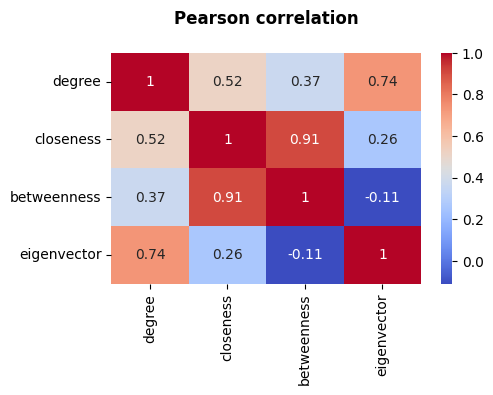

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(pd.DataFrame(corrs),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 90)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('Pearson correlation\n', weight = 'bold')
plt.show()


In [ ]:
all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
ranks = [[scipy.stats.weightedtau(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

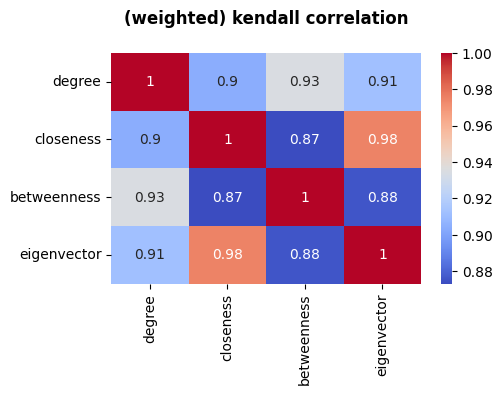

In [ ]:
plt.figure(figsize = (5,3))
sns.heatmap(pd.DataFrame(ranks),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 90)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('(weighted) kendall correlation\n', weight = 'bold')
plt.show()

# Esercizio

* scaricare i dati da http://konect.cc/networks/dimacs10-polblogs/
* costruire un grafo diretto
* calcolare tutti i tipi di centralità
* rispondere alle seguenti domande:
    * qual è il massimo valore di betweenness centrality? (arrotondato a 4 cifre decimali)
    * c'è un nodo che è il primo hub in più di una centralità? se si, quale? (supponendo che ci sia solo un nodo a centralità massima)
    * è più alta la correlazione (rank-aware) tra closeness e betweeness o tra degree e eigenvector?
    * quanti e quali sono i nodi in comune nella top 10 di degree e eigenvector centrality?


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3839abdf-1bdc-4eea-8193-68c122ccc4a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>